# GoodとBadの関係

In [2]:
library(dplyr)
library(lda)
library(stringr)
library(ggplot2)
library(gridExtra)
library(pforeach)
source('/Users/kosuke/研究/code/nikkei/LDA.R')
options(warn=-1)

In [3]:
data <- read.csv("/Users/kosuke/研究/code/airport/airport_review_complete.csv", stringsAsFactors=F)
review <- read.csv("/Users/kosuke/研究/code/airport/morphed_text.csv", stringsAsFactors=F)
lcc <- read.csv("/Users/kosuke/研究/code/airport/airport_lcc.csv")
data$month <- months(as.Date(apply(as.data.frame(data$datetime), 1, get_monthly)))
data$yymm <- as.Date(apply(as.data.frame(data$datetime), 1, get_monthly))
data$year <- as.Date(apply(as.data.frame(data$datetime), 1, get_year))
data$review <- review
target_data <- data[data$yymm >= '2012-01-01',]
target_review <- target_data$review
good_param <- read.csv("modeled_data_good.csv", stringsAsFactors=F)
bad_param <- read.csv("modeled_data_bad.csv", stringsAsFactors=F)
good_param <- cbind(good_param[,c(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 15, 16, 18, 19, 21, 22, 23, 26, 27)],
                    good_param[, -c(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 15, 16, 18, 19, 21, 22, 23, 26, 27)],
                    matrix(0, nrow(good_param), 6)
                    )
colnames(good_param)[28:33] <- colnames(bad_param[,-c(1, 10, 18, 24, 23, 7, 13, 20, 15, 22, 5, 6, 11, 2, 26, 21, 16, 8, 4, 9, 19)])
topic_name <- colnames(good_param)
colnames(good_param) <- seq(1, 33)
bad_param <- cbind(bad_param[,c(1, 10, 18, 24, 23, 7, 13, 20, 15, 22, 5, 6, 11, 2, 26, 21, 16, 8, 4, 9, 19)],
                   matrix(0, nrow(bad_param), 6),
                   bad_param[,-c(1, 10, 18, 24, 23, 7, 13, 20, 15, 22, 5, 6, 11, 2, 26, 21, 16, 8, 4, 9, 19)]
                  )
colnames(bad_param) <- seq(1, 33)
bad_target_data <- target_data[target_data$Recommend != "yes",]
bad_target_review <- bad_target_data$review
good_target_data <- target_data[target_data$Recommend == "yes",]
good_target_review <- good_target_data$review
good_data <- cbind(good_target_data, good_param)
bad_data <- cbind(bad_target_data, bad_param)

In [319]:
tmp <- target_data[,c(13, 7, 4, 14, 16)]
write.csv(tmp, "23W17209_textmining_data.csv", row.names=F)

## 全体

- TODO: xlim,ylimは0.1まででよくね？



In [15]:
mean(bad_param[,10])
mean(good_param[,10])

[1] 0.06246317

[1] 0.02891085

In [16]:
mean(good_param[,16])
mean(bad_param[,16])

[1] 0.03546379

[1] 0.07230412

In [18]:
mean(good_param[,3])
mean(bad_param[,3])

[1] 0.03473325

[1] 0.01092177

In [19]:
mean(good_param[,22])
mean(bad_param[,22])

[1] 0.04582974

[1] 0

In [20]:
mean(good_param[,23])
mean(bad_param[,23])

[1] 0.0400411

[1] 0

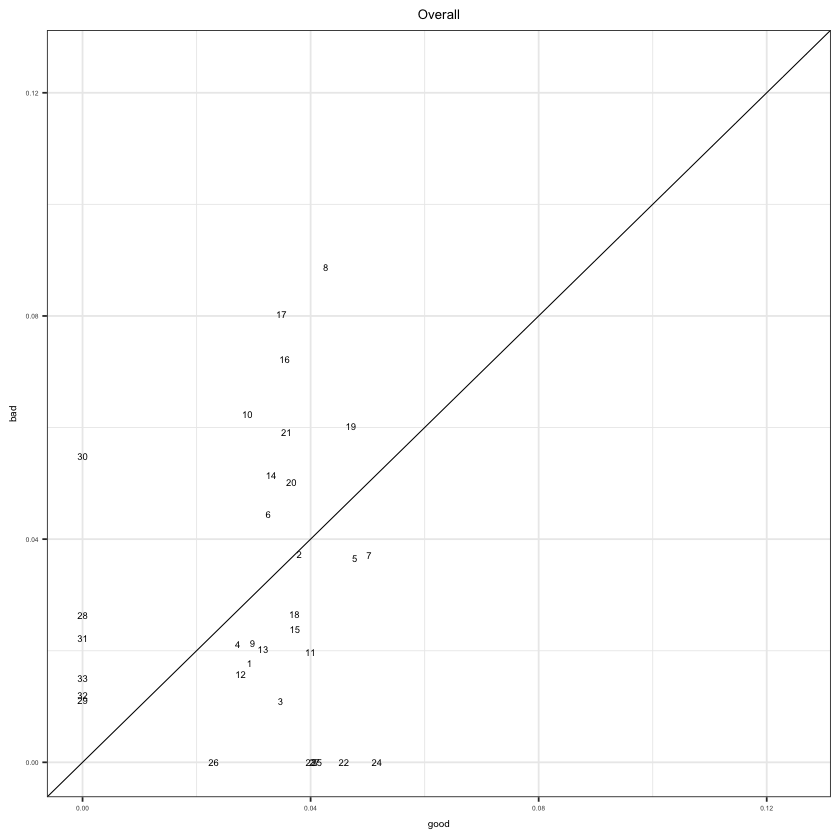

In [299]:
mean_good_param <- apply(good_param, 2, mean)
mean_bad_param <- apply(bad_param, 2, mean)

data <- data.frame(topic_name=names(mean_bad_param),
                   good=mean_good_param,
                   bad=mean_bad_param
                   )
p <- ggplot(data, aes(x=good, y=bad))
p <- p + ggtitle("Overall")
p <- p + theme_bw() 
p <- p + theme(plot.title = element_text(hjust = 0.5, size=8),
               axis.title.x = element_text(size=6),
                 axis.title.y = element_text(size=6),
                 axis.text.x = element_text(size=4),
                 axis.text.y = element_text(size=4))
p <- p + geom_text(aes(y=bad, label=topic_name), size=2)
p <- p + xlim(0, 0.125)
p <- p + ylim(0, 0.125)
p <- p + geom_abline(intercept=0,slope=1, size=0.3) 
ggsave(file = "/Users/kosuke/研究/pic/whole_pos_neg.pdf", plot = p, dpi = 100, width = 1.7, height = 1.7)
p


## トランジットかどうかで頑張る

In [21]:
good_target_data <- good_data[!is.na(good_data$Experience.At.Airport) & good_data$Experience.At.Airport != '',]
bad_target_data <- bad_data[!is.na(bad_data$Experience.At.Airport) & bad_data$Experience.At.Airport != '',]
good_transit_param <- good_target_data[good_target_data$Experience.At.Airport == 'Transit', 21:53]
good_land_param <-good_target_data[good_target_data$Experience.At.Airport != 'Transit', 21:53]
bad_transit_param <- bad_target_data[bad_target_data$Experience.At.Airport == 'Transit', 21:53]
bad_land_param <-bad_target_data[bad_target_data$Experience.At.Airport != 'Transit', 21:53]

In [26]:
mean(good_transit_param[,10])
mean(bad_transit_param[,10])
mean(good_land_param[,10])
mean(bad_land_param[,10])

[1] 0.02429905

[1] 0.07382732

[1] 0.02989803

[1] 0.06569216

In [27]:
mean(good_transit_param[,16])
mean(bad_transit_param[,16])
mean(good_land_param[,16])
mean(bad_land_param[,16])

[1] 0.05144787

[1] 0.1024908

[1] 0.02702899

[1] 0.05855911

In [28]:
mean(good_transit_param[,3])
mean(bad_transit_param[,3])
mean(good_land_param[,3])
mean(bad_land_param[,3])

[1] 0.05594498

[1] 0.01468849

[1] 0.02903432

[1] 0.01022604

In [29]:
mean(good_transit_param[,22])
mean(bad_transit_param[,22])
mean(good_land_param[,22])
mean(bad_land_param[,22])

[1] 0.06530181

[1] 0

[1] 0.04650481

[1] 0

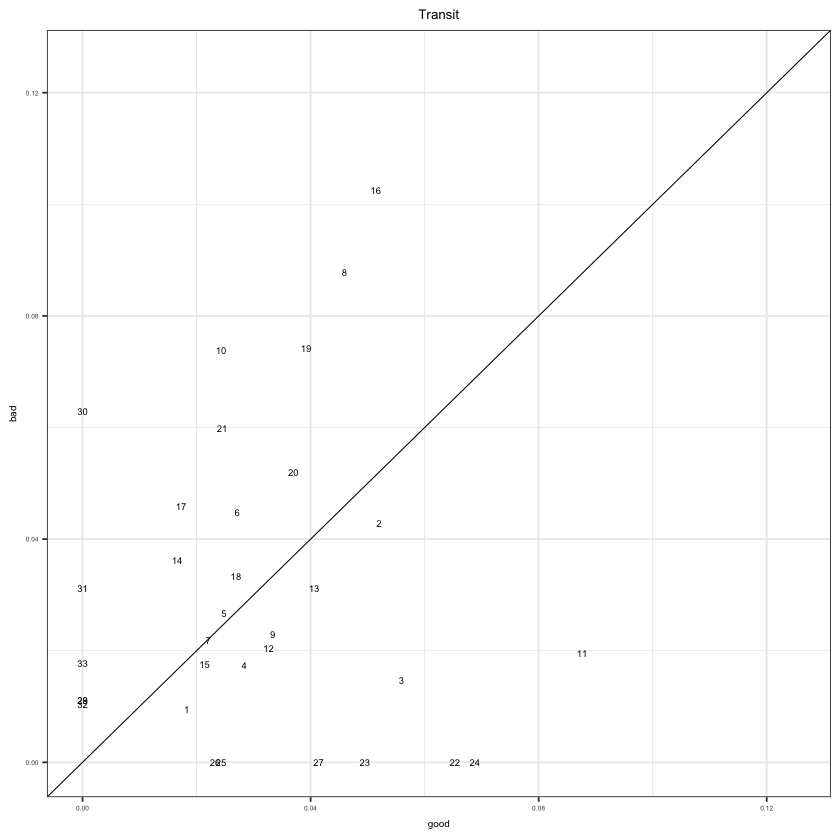

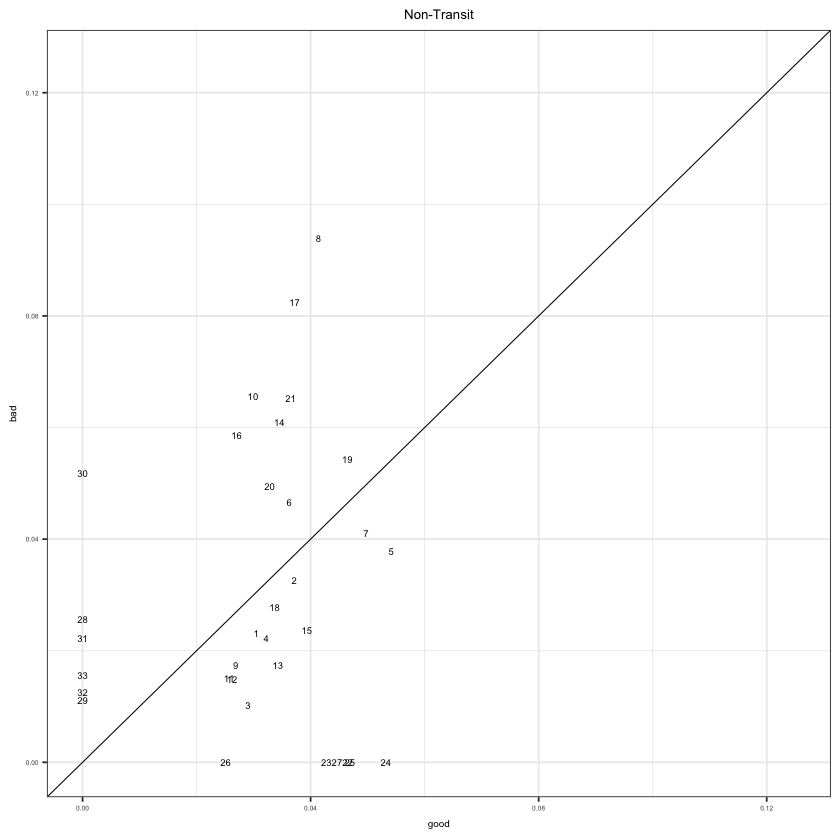

In [309]:
mean_good_param <- apply(good_transit_param, 2, mean)
mean_bad_param <- apply(bad_transit_param, 2, mean)
data <- data.frame(topic_name=names(mean_bad_param),
                   good=mean_good_param,
                   bad=mean_bad_param
                   )
p1 <- ggplot(data, aes(x=good, y=bad))
p1 <- p1 + theme_bw() 
p1 <- p1 + ggtitle("Transit")
p1 <- p1 + theme(plot.title = element_text(hjust = 0.5, size=8),
                 axis.title.x = element_text(size=6),
                 axis.title.y = element_text(size=6),
                 axis.text.x = element_text(size=4),
                 axis.text.y = element_text(size=4))
p1 <- p1 + geom_text(aes(y=bad, label=topic_name), size=2)
p1 <- p1 + xlim(0, 0.125)
p1 <- p1 + ylim(0, 0.125)
p1 <- p1 + geom_abline(intercept=0,slope=1, size=0.3) 
p1
ggsave(file = "/Users/kosuke/研究/pic/transit_pos_neg.pdf", plot = p1, dpi = 100, width = 1.7, height = 1.7)

mean_good_param <- apply(good_land_param, 2, mean)
mean_bad_param <- apply(bad_land_param, 2, mean)
data <- data.frame(topic_name=names(mean_bad_param),
                   good=mean_good_param, 
                   bad=mean_bad_param)
p2 <- ggplot(data, aes(x=good, y=bad))
p2 <- p2 + theme_bw() 
p2 <- p2 + ggtitle("Non-Transit")
p2 <- p2 + theme(plot.title = element_text(hjust = 0.5, size=8),
                 axis.title.x = element_text(size=6),
                 axis.title.y = element_text(size=6),
                 axis.text.x = element_text(size=4),
                 axis.text.y = element_text(size=4))
p2 <- p2 + geom_text(aes(y=bad, label=topic_name), size=2)
p2 <- p2 + xlim(0, 0.125)
p2 <- p2 + ylim(0, 0.125)
p2 <- p2 + geom_abline(intercept=0,slope=1, size=0.3) 
p2
ggsave(file = "/Users/kosuke/研究/pic/non-transit_pos_neg.pdf", plot = p2, dpi = 100, width = 1.7, height = 1.7)

#### 発見
- 31番（案内）がトランジットで大きな傾向を見せている
- 同様に10番（スタッフへの問い合わせ）、16番（ターミナル間移動）、19番（スタッフの役立ちさ）もそんな感じ
    - すなわちトランジットでは移動が多いので案内の重要性が考えられる
- 

## 渡航目的

In [30]:
good_target_data <- good_data[!is.na(good_data$Type.Of.Traveller) & good_data$Type.Of.Traveller != '',]
bad_target_data <- bad_data[!is.na(bad_data$Type.Of.Traveller) & bad_data$Type.Of.Traveller != '',]
good_business_param <- good_target_data[good_target_data$Type.Of.Traveller == 'Business', 21:53]
good_leisure_param <-good_target_data[good_target_data$Type.Of.Traveller != 'Business', 21:53]
bad_business_param <- bad_target_data[bad_target_data$Type.Of.Traveller == 'Business', 21:53]
bad_leisure_param <-bad_target_data[bad_target_data$Type.Of.Traveller != 'Business', 21:53]

In [31]:
mean(good_business_param[,10])
mean(bad_business_param[,10])
mean(good_leisure_param[,10])
mean(bad_leisure_param[,10])

[1] 0.02786281

[1] 0.04924486

[1] 0.02893545

[1] 0.07309019

In [32]:
mean(good_business_param[,16])
mean(bad_business_param[,16])
mean(good_leisure_param[,16])
mean(bad_leisure_param[,16])

[1] 0.03036041

[1] 0.0815043

[1] 0.03278122

[1] 0.06657751

In [33]:
mean(good_business_param[,3])
mean(bad_business_param[,3])
mean(good_leisure_param[,3])
mean(bad_leisure_param[,3])

[1] 0.03079881

[1] 0.01187819

[1] 0.03554073

[1] 0.0112344

In [34]:
mean(good_business_param[,22])
mean(bad_business_param[,22])
mean(good_leisure_param[,22])
mean(bad_leisure_param[,22])

[1] 0.04592483

[1] 0

[1] 0.0516417

[1] 0

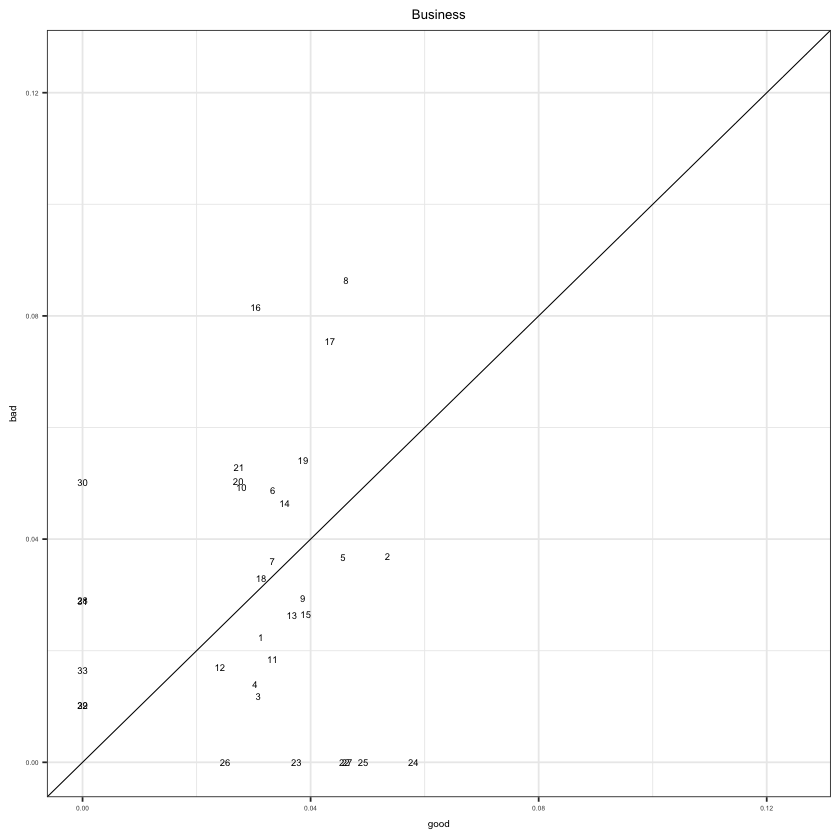

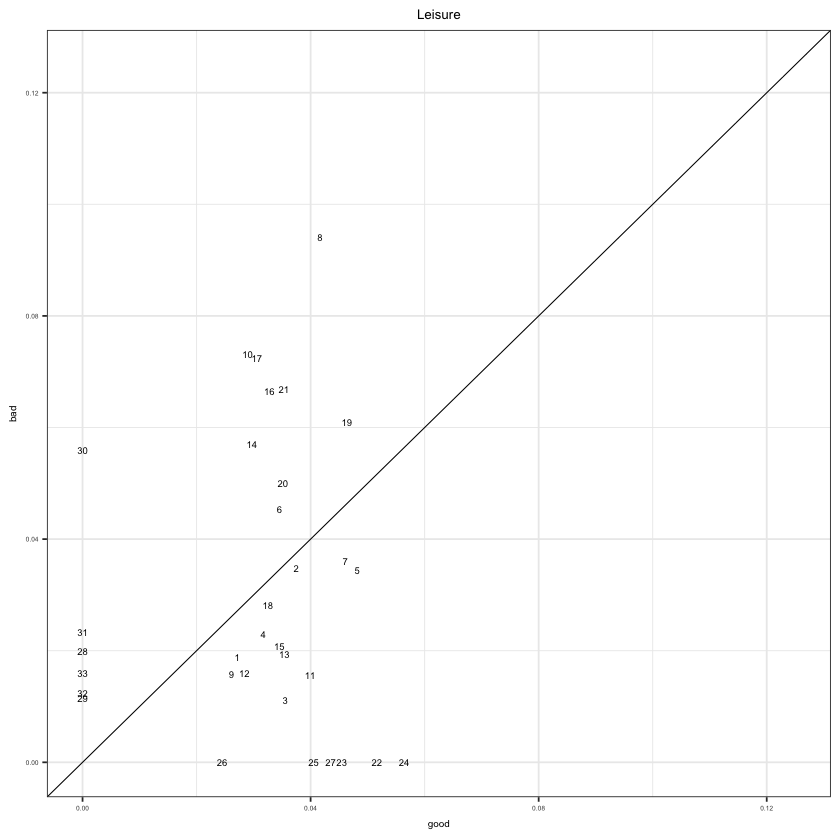

In [301]:
mean_good_param <- apply(good_business_param, 2, mean)
mean_bad_param <- apply(bad_business_param, 2, mean)
data <- data.frame(topic_name=names(mean_bad_param),
                   good=mean_good_param,
                   bad=mean_bad_param)
p1 <- ggplot(data, aes(x=good, y=bad))
p1 <- p1 + theme_bw() 
p1 <- p1 + ggtitle("Business")
p1 <- p1 + theme(plot.title = element_text(hjust = 0.5, size=8),
                 axis.title.x = element_text(size=6),
                 axis.title.y = element_text(size=6),
                 axis.text.x = element_text(size=4),
                 axis.text.y = element_text(size=4))
p1 <- p1 + geom_text(aes(y=bad, label=topic_name), size=2)
p1 <- p1 + xlim(0, 0.125)
p1 <- p1 + ylim(0, 0.125)
p1 <- p1 + geom_abline(intercept=0,slope=1, size=0.3) 
p1 <- p1 + guides(colour=F)
p1
ggsave(file = "/Users/kosuke/研究/pic/business_pos_neg.pdf", plot = p1, dpi = 100, width = 1.7, height = 1.7)

mean_good_param <- apply(good_leisure_param, 2, mean)
mean_bad_param <- apply(bad_leisure_param, 2, mean)
data <- data.frame(topic_name=names(mean_bad_param),
                   good=mean_good_param,
                   bad=mean_bad_param)
p2 <- ggplot(data, aes(x=good, y=bad))
p2 <- p2 + theme_bw()
p2 <- p2 + ggtitle("Leisure")
p2 <- p2 + theme(plot.title = element_text(hjust = 0.5, size=8),
                 axis.title.x = element_text(size=6),
                 axis.title.y = element_text(size=6),
                 axis.text.x = element_text(size=4),
                 axis.text.y = element_text(size=4))
p2 <- p2 + geom_text(aes(y=bad, label=topic_name), size=2)
p2 <- p2 + xlim(0, 0.125)
p2 <- p2 + ylim(0, 0.125)
p2 <- p2 + geom_abline(intercept=0,slope=1, size=0.3) 
p2 <- p2 + guides(colour=F)
p2
ggsave(file = "/Users/kosuke/研究/pic/leisure_pos_neg.pdf", plot = p2, dpi = 100, width = 1.7, height = 1.7)

- ビジネスは16ターミナル間移動、20遅延、に負担を感じる
- レジャーは8セキュリティチェック列、10スタッフへの問い合わせ、14入国審査列に負担を感じる
- 22,23が旅行客にとって大事
- 31,28がビジネスにとって負担

TableGrob (3 x 2) "arrange": 5 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (1-1,2-2) arrange gtable[layout]
3 3 (2-2,1-1) arrange gtable[layout]
4 4 (2-2,2-2) arrange gtable[layout]
5 5 (3-3,1-1) arrange gtable[layout]

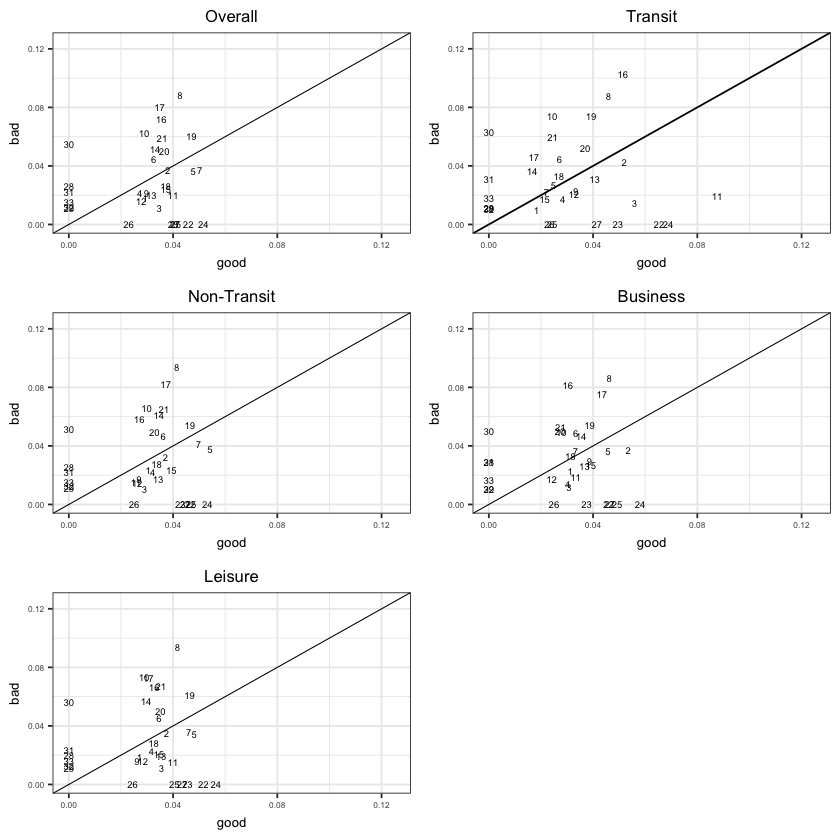

In [279]:
mean_good_param <- apply(good_param, 2, mean)
mean_bad_param <- apply(bad_param, 2, mean)

data <- data.frame(topic_name=names(mean_bad_param),
                   good=mean_good_param,
                   bad=mean_bad_param
                   )
p0 <- ggplot(data, aes(x=good, y=bad))
p0 <- p0 + theme_bw() 
p0 <- p0 + ggtitle("Overall")
p0 <- p0 + theme(plot.title = element_text(hjust = 0.5, size=10),
                 axis.title.x = element_text(size=8),
                 axis.title.y = element_text(size=8),
                 axis.text.x = element_text(size=5),
                 axis.text.y = element_text(size=5))
p0 <- p0 + geom_text(aes(y=bad, label=topic_name), size=2)
p0 <- p0 + xlim(0, 0.125)
p0 <- p0 + ylim(0, 0.125)
p0 <- p0 + geom_abline(intercept=0,slope=1, size=0.3) 

mean_good_param <- apply(good_transit_param, 2, mean)
mean_bad_param <- apply(bad_transit_param, 2, mean)
data <- data.frame(topic_name=names(mean_bad_param),
                   good=mean_good_param,
                   bad=mean_bad_param
                   )
p1 <- ggplot(data, aes(x=good, y=bad))
p1 <- p1 + theme_bw() 
p1 <- p1 + ggtitle("Transit")
p1 <- p1 + theme(plot.title = element_text(hjust = 0.5, size=10),
                 axis.title.x = element_text(size=8),
                 axis.title.y = element_text(size=8),
                 axis.text.x = element_text(size=5),
                 axis.text.y = element_text(size=5))
p1 <- p1 + geom_text(aes(y=bad, label=topic_name), size=2)
p1 <- p1 + xlim(0, 0.125)
p1 <- p1 + ylim(0, 0.125)
p1 <- p1 + geom_abline(intercept=0,slope=1) 

mean_good_param <- apply(good_land_param, 2, mean)
mean_bad_param <- apply(bad_land_param, 2, mean)
data <- data.frame(topic_name=names(mean_bad_param),
                   good=mean_good_param, 
                   bad=mean_bad_param)
p2 <- ggplot(data, aes(x=good, y=bad))
p2 <- p2 + theme_bw() 
p2 <- p2 + ggtitle("Non-Transit")
p2 <- p2 + theme(plot.title = element_text(hjust = 0.5, size=10),
                 axis.title.x = element_text(size=8),
                 axis.title.y = element_text(size=8),
                 axis.text.x = element_text(size=5),
                 axis.text.y = element_text(size=5))
p2 <- p2 + geom_text(aes(y=bad, label=topic_name), size=2)
p2 <- p2 + xlim(0, 0.125)
p2 <- p2 + ylim(0, 0.125)
p2 <- p2 + geom_abline(intercept=0,slope=1, size=0.3) 

mean_good_param <- apply(good_business_param, 2, mean)
mean_bad_param <- apply(bad_business_param, 2, mean)
data <- data.frame(topic_name=names(mean_bad_param),
                   good=mean_good_param,
                   bad=mean_bad_param)
p3 <- ggplot(data, aes(x=good, y=bad))
p3 <- p3 + theme_bw() 
p3 <- p3 + ggtitle("Business")
p3 <- p3 + theme(plot.title = element_text(hjust = 0.5, size=10),
                 axis.title.x = element_text(size=8),
                 axis.title.y = element_text(size=8),
                 axis.text.x = element_text(size=5),
                 axis.text.y = element_text(size=5))
p3 <- p3 + geom_text(aes(y=bad, label=topic_name), size=2)
p3 <- p3 + xlim(0, 0.125)
p3 <- p3 + ylim(0, 0.125)
p3 <- p3 + geom_abline(intercept=0,slope=1, size=0.3) 
p3 <- p3 + guides(colour=F)

mean_good_param <- apply(good_leisure_param, 2, mean)
mean_bad_param <- apply(bad_leisure_param, 2, mean)
data <- data.frame(topic_name=names(mean_bad_param),
                   good=mean_good_param,
                   bad=mean_bad_param)
p4 <- ggplot(data, aes(x=good, y=bad))
p4 <- p4 + theme_bw()
p4 <- p4 + ggtitle("Leisure")
p4 <- p4 + theme(plot.title = element_text(hjust = 0.5, size=10),
                 axis.title.x = element_text(size=8),
                 axis.title.y = element_text(size=8),
                 axis.text.x = element_text(size=5),
                 axis.text.y = element_text(size=5))
p4 <- p4 + geom_text(aes(y=bad, label=topic_name), size=2)
p4 <- p4 + xlim(0, 0.125)
p4 <- p4 + ylim(0, 0.125)
p4 <- p4 + geom_abline(intercept=0,slope=1, size=0.3) 
p4 <- p4 + guides(colour=F)
p <- grid.arrange(p0, p1, p2, p3, p4, ncol=2)
p
ggsave(file = "/Users/kosuke/研究/pic/pos_neg.pdf", plot = p, dpi = 100, width = 4.0, height = 5.6)